<p style="font-family: Arial; font-size:3.75em;color:purple; font-style:bold"><br>
Pandas</p><br>

*pandas* is a Python library for data analysis. It offers a number of data exploration, cleaning and transformation operations that are critical in working with data in Python. 

*pandas* build upon *numpy* and *scipy* providing easy-to-use data structures and data manipulation functions with integrated indexing.

The main data structures *pandas* provides are *Series* and *DataFrames*. After a brief introduction to these two data structures and data ingestion, the key features of *pandas* this notebook covers are:
* Generating descriptive statistics on data
* Data cleaning using built in pandas functions
* Frequent data operations for subsetting, filtering, insertion, deletion and aggregation of data
* Merging multiple datasets using dataframes
* Working with timestamps and time-series data

**Additional Recommended Resources:**
* *pandas* Documentation: http://pandas.pydata.org/pandas-docs/stable/
* *Python for Data Analysis* by Wes McKinney
* *Python Data Science Handbook* by Jake VanderPlas

Let's get started with our first *pandas* notebook!

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"><br>

Import Libraries
</p>

In [1]:
import pandas as pd

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
Introduction to pandas Data Structures</p>
<br>
*pandas* has two main data structures it uses, namely, *Series* and *DataFrames*. 

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
pandas Series</p>

*pandas Series* one-dimensional labeled array. 


In [2]:
ser = pd.Series([22,34,76,43,36], ['Deepak', 'Amit', 'Kavita', 'Rakesh', 'Rashmi'])

In [3]:
ser

Deepak    22
Amit      34
Kavita    76
Rakesh    43
Rashmi    36
dtype: int64

In [4]:
ser.index

Index(['Deepak', 'Amit', 'Kavita', 'Rakesh', 'Rashmi'], dtype='object')

In [5]:
ser.loc[['Deepak','Kavita']]

Deepak    22
Kavita    76
dtype: int64

In [6]:
ser[[4]] #Starting at 0 to 4

Rashmi    36
dtype: int64

In [7]:
ser.iloc[2]

76

In [8]:
'Amit' in ser #Return Boolean

True

In [9]:
ser

Deepak    22
Amit      34
Kavita    76
Rakesh    43
Rashmi    36
dtype: int64

In [10]:
ser * 2 #Multiplying by 2

Deepak     44
Amit       68
Kavita    152
Rakesh     86
Rashmi     72
dtype: int64

In [11]:
ser[['Deepak', 'Amit']] ** 2 #Squaring the values

Deepak     484
Amit      1156
dtype: int64

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
pandas DataFrame</p>

*pandas DataFrame* is a 2-dimensional labeled data structure.

<p style="font-family: Arial; font-size:1.25em;color:#2462C0; font-style:bold">
Create DataFrame from dictionary of Python Series</p>

In [12]:
d = {'Age' : pd.Series([22,34,32,43,36], index=['Deepak', 'Amit', 'Kavita', 'Rakesh', 'Rashmi']),
     'Sallary' : pd.Series([10000,20000,13000,14500,15000], index=['Deepak', 'Amit', 'Kavita', 'Rakesh', 'Rashmi'])}

In [13]:
df = pd.DataFrame(d)
print(df)

        Age  Sallary
Deepak   22    10000
Amit     34    20000
Kavita   32    13000
Rakesh   43    14500
Rashmi   36    15000


In [14]:
df.index

Index(['Deepak', 'Amit', 'Kavita', 'Rakesh', 'Rashmi'], dtype='object')

In [15]:
df.columns

Index(['Age', 'Sallary'], dtype='object')

In [16]:
pd.DataFrame(d, index=['Amit', 'Kavita', 'Rakesh'])

,Age,Sallary
Amit,34,20000
Kavita,32,13000
Rakesh,43,14500


In [17]:
pd.DataFrame(d, index=['Amit', 'Kavita', 'Rakesh'], columns=['Age', 'Sallary'])

,Age,Sallary
Amit,34,20000
Kavita,32,13000
Rakesh,43,14500


<p style="font-family: Arial; font-size:1.25em;color:#2462C0; font-style:bold">
Create DataFrame from list of Python dictionaries</p>

In [18]:
data = [{'Deepak': 1, 'Ashish': 2}, {'Kavita': 5, 'Rajni': 10, 'Rakesh': 20}]

In [19]:
pd.DataFrame(data)

,Ashish,Deepak,Kavita,Rajni,Rakesh
0,2.0,1.0,NaN,NaN,NaN
1,NaN,NaN,5.0,10.0,20.0


In [20]:
pd.DataFrame(data, index=['Section1', 'Section2'])

,Ashish,Deepak,Kavita,Rajni,Rakesh
Section1,2.0,1.0,NaN,NaN,NaN
Section2,NaN,NaN,5.0,10.0,20.0


In [21]:
pd.DataFrame(data, columns=['Ashish', 'Rajni','Deepak'])

,Ashish,Rajni,Deepak
0,2.0,NaN,1.0
1,NaN,10.0,NaN


<p style="font-family: Arial; font-size:1.25em;color:#2462C0; font-style:bold">
Basic DataFrame operations</p>

In [22]:
df #Show the dataframe

,Age,Sallary
Deepak,22,10000
Amit,34,20000
Kavita,32,13000
Rakesh,43,14500
Rashmi,36,15000


In [23]:
df['Age']

Deepak    22
Amit      34
Kavita    32
Rakesh    43
Rashmi    36
Name: Age, dtype: int64

In [24]:
df['HigherSalary'] = df['Sallary'] > 13000
df

,Age,Sallary,HigherSalary
Deepak,22,10000,False
Amit,34,20000,True
Kavita,32,13000,False
Rakesh,43,14500,True
Rashmi,36,15000,True


In [25]:
Age = df.pop('Age') #Remove collumn

In [26]:
Age

Deepak    22
Amit      34
Kavita    32
Rakesh    43
Rashmi    36
Name: Age, dtype: int64

In [27]:
df

,Sallary,HigherSalary
Deepak,10000,False
Amit,20000,True
Kavita,13000,False
Rakesh,14500,True
Rashmi,15000,True


In [28]:
del df['HigherSalary'] #Delete collmn from data frame

In [29]:
df

,Sallary
Deepak,10000
Amit,20000
Kavita,13000
Rakesh,14500
Rashmi,15000


In [30]:
df.insert(0, 'copy1_of_Sallary', df['Sallary'])
df

,copy1_of_Sallary,Sallary
Deepak,10000,10000
Amit,20000,20000
Kavita,13000,13000
Rakesh,14500,14500
Rashmi,15000,15000


In [31]:
df['one_upper_half'] = df['one'][:2]
df

KeyError: 'one'

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
Case Study: Movie Data Analysis</p>
<br>This notebook uses a dataset from the MovieLens website. We will describe the dataset further as we explore with it using *pandas*. 

## Download the Dataset

Please note that **you will need to download the dataset**. Although the video for this notebook says that the data is in your folder, the folder turned out to be too large to fit on the edX platform due to size constraints.

Here are the links to the data source and location:
* **Data Source:** MovieLens web site (filename: ml-20m.zip)
* **Location:** https://grouplens.org/datasets/movielens/

Once the download completes, please make sure the data files are in a directory called *movielens* in your *Week-3-pandas* folder. 

Let us look at the files in this dataset using the UNIX command ls.


<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
Use Pandas to Read the Dataset<br>
</p>
<br>
In this notebook, we will be using three CSV files:
* **ratings.csv :** *userId*,*movieId*,*rating*, *timestamp*
* **tags.csv :** *userId*,*movieId*, *tag*, *timestamp*
* **movies.csv :** *movieId*, *title*, *genres* <br>

Using the *read_csv* function in pandas, we will ingest these three files.

In [32]:
movies = pd.read_csv('C:\\HenryHarvin\\Dataset\\movies.csv', sep=',')
print(type(movies))
movies.head(15)

<class 'pandas.core.frame.DataFrame'>


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [33]:
# Timestamps represent seconds since midnight Coordinated Universal Time (UTC) of January 1, 1970

tags = pd.read_csv('C:\\HenryHarvin\\Dataset\\tags.csv', sep=',')
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [34]:
ratings = pd.read_csv('C:\\HenryHarvin\\Dataset\\ratings.csv', sep=',', parse_dates=['timestamp'])
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [35]:
# For current analysis, we will remove timestamp (we will come back to it!)

del ratings['timestamp']
del tags['timestamp']

<h1 style="font-size:2em;color:#2467C0">Data Structures </h1>

<h1 style="font-size:1.5em;color:#2467C0">Series</h1>

In [36]:
#Extract 0th row: notice that it is infact a Series

row_0 = tags.iloc[0]
type(row_0)

pandas.core.series.Series

In [37]:
print(row_0)

userId         2
movieId    60756
tag        funny
Name: 0, dtype: object


In [38]:
row_0.index

Index(['userId', 'movieId', 'tag'], dtype='object')

In [39]:
row_0['userId']

2

In [40]:
'rating' in row_0

False

In [41]:
row_0.name

0

In [42]:
row_0 = row_0.rename('first_row')
row_0.name

'first_row'

<h1 style="font-size:1.5em;color:#2467C0">DataFrames </h1>

In [43]:
tags.head()

,userId,movieId,tag
0,2,60756,funny
1,2,60756,Highly quotable
2,2,60756,will ferrell
3,2,89774,Boxing story
4,2,89774,MMA


In [44]:
tags.index

RangeIndex(start=0, stop=3683, step=1)

In [45]:
tags.columns

Index(['userId', 'movieId', 'tag'], dtype='object')

In [46]:
# Extract row 0, 11, 2000 from DataFrame

tags.iloc[ [0,11,2000] ]

,userId,movieId,tag
0,2,60756,funny
11,18,431,gangster
2000,474,5450,women


<h1 style="font-size:2em;color:#2467C0">Descriptive Statistics</h1>

Let's look how the ratings are distributed! 

In [47]:
ratings['rating'].describe() #Only Rating wil be reflected

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

In [48]:
ratings.describe() #Whole dataset will be described

,userId,movieId,rating
count,100836.000000,100836.000000,100836.000000
mean,326.127564,19435.295718,3.501557
std,182.618491,35530.987199,1.042529
min,1.000000,1.000000,0.500000
25%,177.000000,1199.000000,3.000000
50%,325.000000,2991.000000,3.500000
75%,477.000000,8122.000000,4.000000
max,610.000000,193609.000000,5.000000


In [49]:
ratings['rating'].mean()

3.501556983616962

In [50]:
ratings.mean()

userId       326.127564
movieId    19435.295718
rating         3.501557
dtype: float64

In [51]:
ratings['rating'].min()

0.5

In [52]:
ratings['rating'].max()

5.0

In [53]:
ratings['rating'].std()

1.0425292390605359

In [54]:
ratings['rating'].mode()

0    4.0
dtype: float64

In [55]:
ratings.corr()

,userId,movieId,rating
userId,1.000000,0.006773,-0.049348
movieId,0.006773,1.000000,-0.004061
rating,-0.049348,-0.004061,1.000000


In [56]:
filter_1 = ratings['rating'] > 5
print(filter_1)
filter_1.any()

0         False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29        False
          ...  
100806    False
100807    False
100808    False
100809    False
100810    False
100811    False
100812    False
100813    False
100814    False
100815    False
100816    False
100817    False
100818    False
100819    False
100820    False
100821    False
100822    False
100823    False
100824    False
100825    False
100826    False
100827    False
100828    False
100829    False
100830    False
100831    False
100832    False
100833    False
100834    False
100835    False
Name: rating, Length: 10

False

In [57]:
filter_2 = ratings['rating'] > 0
print(filter_2)
filter_2.all()

0         True
1         True
2         True
3         True
4         True
5         True
6         True
7         True
8         True
9         True
10        True
11        True
12        True
13        True
14        True
15        True
16        True
17        True
18        True
19        True
20        True
21        True
22        True
23        True
24        True
25        True
26        True
27        True
28        True
29        True
          ... 
100806    True
100807    True
100808    True
100809    True
100810    True
100811    True
100812    True
100813    True
100814    True
100815    True
100816    True
100817    True
100818    True
100819    True
100820    True
100821    True
100822    True
100823    True
100824    True
100825    True
100826    True
100827    True
100828    True
100829    True
100830    True
100831    True
100832    True
100833    True
100834    True
100835    True
Name: rating, Length: 100836, dtype: bool


True

<h1 style="font-size:2em;color:#2467C0">Data Cleaning: Handling Missing Data</h1>

In [58]:
movies.shape

(9742, 3)

In [59]:
#is any row NULL ?

movies.isnull().any()

movieId    False
title      False
genres     False
dtype: bool

Thats nice ! No NULL values !

In [60]:
ratings.shape

(100836, 3)

In [61]:
#is any row NULL ?

ratings.isnull().any()

userId     False
movieId    False
rating     False
dtype: bool

Thats nice ! No NULL values !

In [62]:
tags.shape

(3683, 3)

In [63]:
#is any row NULL ?

tags.isnull().any()

userId     False
movieId    False
tag        False
dtype: bool

We have some tags which are NULL.

In [64]:
tags = tags.dropna()

In [65]:
#Check again: is any row NULL ?

tags.isnull().any()

userId     False
movieId    False
tag        False
dtype: bool

In [66]:
tags.shape

(3683, 3)

Thats nice ! No NULL values ! Notice the number of lines have reduced.

<h1 style="font-size:2em;color:#2467C0">Data Visualization</h1>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000F62906FD30>]],
      dtype=object)

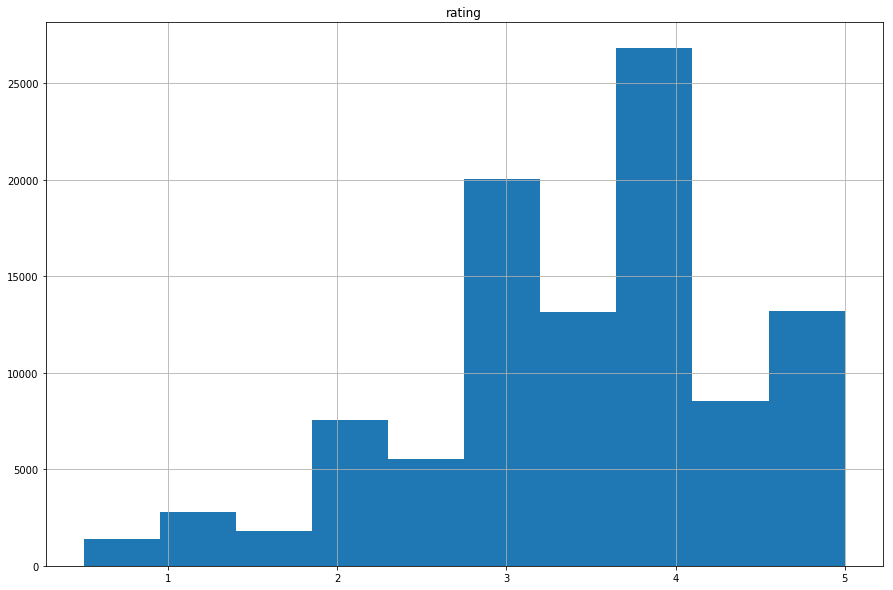

In [67]:
%matplotlib inline

ratings.hist(column='rating', figsize=(15,10))

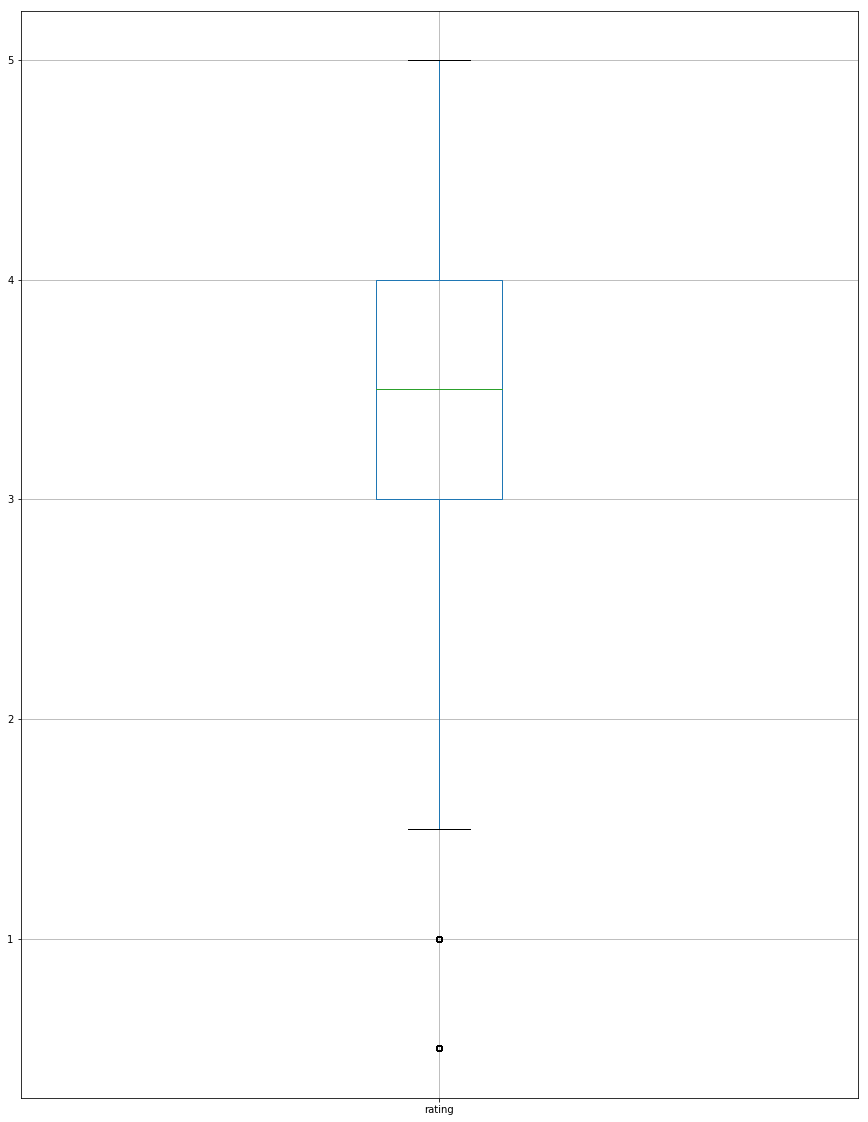

In [68]:
ratings.boxplot(column='rating', figsize=(15,20))

<h1 style="font-size:2em;color:#2467C0">Slicing Out Columns</h1>
 

In [69]:
tags['tag'].head()

0              funny
1    Highly quotable
2       will ferrell
3       Boxing story
4                MMA
Name: tag, dtype: object

In [70]:
movies[['title','genres']].head()

,title,genres
0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,Jumanji (1995),Adventure|Children|Fantasy
2,Grumpier Old Men (1995),Comedy|Romance
3,Waiting to Exhale (1995),Comedy|Drama|Romance
4,Father of the Bride Part II (1995),Comedy


In [71]:
ratings[-10:]

,userId,movieId,rating
100826,610,162350,3.5
100827,610,163937,3.5
100828,610,163981,3.5
100829,610,164179,5.0
100830,610,166528,4.0
100831,610,166534,4.0
100832,610,168248,5.0
100833,610,168250,5.0
100834,610,168252,5.0
100835,610,170875,3.0


In [72]:
tag_counts = tags['tag'].value_counts()
tag_counts[-10:]

pigs                  1
unnecessary sequel    1
shakespeare           1
pool                  1
not funny             1
tolkien               1
Howard Hughes         1
genocide              1
1900s                 1
ben stiller           1
Name: tag, dtype: int64

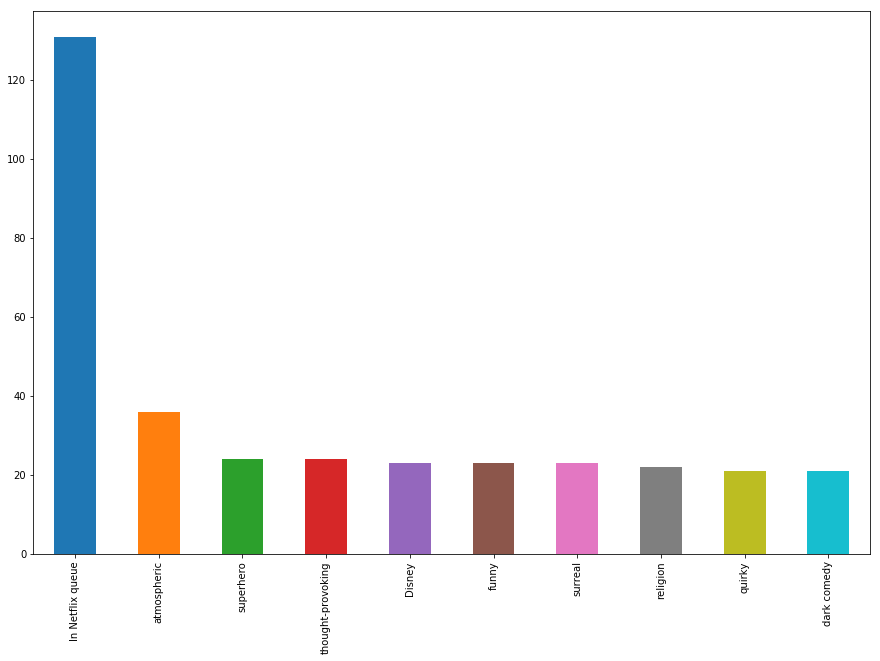

In [73]:
tag_counts[:10].plot(kind='bar', figsize=(15,10))

<h1 style="font-size:2em;color:#2467C0">Filters for Selecting Rows</h1>

In [74]:
is_highly_rated = ratings['rating'] >= 4.0

ratings[is_highly_rated][30:50]

,userId,movieId,rating
36,1,608,5.0
38,1,661,5.0
40,1,733,4.0
43,1,804,4.0
44,1,919,5.0
45,1,923,5.0
46,1,940,5.0
47,1,943,4.0
48,1,954,5.0
50,1,1023,5.0


In [75]:
is_animation = movies['genres'].str.contains('Animation')

movies[is_animation][5:15]

,movieId,title,genres
322,364,"Lion King, The (1994)",Adventure|Animation|Children|Drama|Musical|IMAX
483,551,"Nightmare Before Christmas, The (1993)",Animation|Children|Fantasy|Musical
488,558,"Pagemaster, The (1994)",Action|Adventure|Animation|Children|Fantasy
506,588,Aladdin (1992),Adventure|Animation|Children|Comedy|Musical
511,594,Snow White and the Seven Dwarfs (1937),Animation|Children|Drama|Fantasy|Musical
512,595,Beauty and the Beast (1991),Animation|Children|Fantasy|Musical|Romance|IMAX
513,596,Pinocchio (1940),Animation|Children|Fantasy|Musical
522,610,Heavy Metal (1981),Action|Adventure|Animation|Horror|Sci-Fi
527,616,"Aristocats, The (1970)",Animation|Children
534,631,All Dogs Go to Heaven 2 (1996),Adventure|Animation|Children|Fantasy|Musical|R...


In [76]:
movies[is_animation].head(15)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
12,13,Balto (1995),Adventure|Animation|Children
44,48,Pocahontas (1995),Animation|Children|Drama|Musical|Romance
205,239,"Goofy Movie, A (1995)",Animation|Children|Comedy|Romance
272,313,"Swan Princess, The (1994)",Animation|Children
322,364,"Lion King, The (1994)",Adventure|Animation|Children|Drama|Musical|IMAX
483,551,"Nightmare Before Christmas, The (1993)",Animation|Children|Fantasy|Musical
488,558,"Pagemaster, The (1994)",Action|Adventure|Animation|Children|Fantasy
506,588,Aladdin (1992),Adventure|Animation|Children|Comedy|Musical
511,594,Snow White and the Seven Dwarfs (1937),Animation|Children|Drama|Fantasy|Musical


<h1 style="font-size:2em;color:#2467C0">Group By and Aggregate </h1>

In [77]:
ratings_count = ratings[['movieId','rating']].groupby('rating').count()
ratings_count

,movieId
rating,
0.5,1370
1.0,2811
1.5,1791
2.0,7551
2.5,5550
3.0,20047
3.5,13136
4.0,26818
4.5,8551


In [78]:
average_rating = ratings[['movieId','rating']].groupby('movieId').mean()
average_rating.head()

,rating
movieId,
1,3.920930
2,3.431818
3,3.259615
4,2.357143
5,3.071429


In [79]:
movie_count = ratings[['movieId','rating']].groupby('movieId').count()
movie_count.head()

,rating
movieId,
1,215
2,110
3,52
4,7
5,49


In [80]:
movie_count = ratings[['movieId','rating']].groupby('movieId').count()
movie_count.tail()

,rating
movieId,
193581,1
193583,1
193585,1
193587,1
193609,1


<h1 style="font-size:2em;color:#2467C0">Merge Dataframes</h1>

In [81]:
tags.head()

,userId,movieId,tag
0,2,60756,funny
1,2,60756,Highly quotable
2,2,60756,will ferrell
3,2,89774,Boxing story
4,2,89774,MMA


In [82]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [83]:
t = movies.merge(tags, on='movieId', how='inner')
t.head()

,movieId,title,genres,userId,tag
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,336,pixar
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,474,pixar
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,567,fun
3,2,Jumanji (1995),Adventure|Children|Fantasy,62,fantasy
4,2,Jumanji (1995),Adventure|Children|Fantasy,62,magic board game


More examples: http://pandas.pydata.org/pandas-docs/stable/merging.html

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"><br>


Combine aggreagation, merging, and filters to get useful analytics
</p>

In [84]:
avg_ratings = ratings.groupby('movieId', as_index=False).mean()
del avg_ratings['userId']
avg_ratings.head()

,movieId,rating
0,1,3.920930
1,2,3.431818
2,3,3.259615
3,4,2.357143
4,5,3.071429


In [85]:
box_office = movies.merge(avg_ratings, on='movieId', how='inner')
box_office.tail()

,movieId,title,genres,rating
9719,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,4.0
9720,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,3.5
9721,193585,Flint (2017),Drama,3.5
9722,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,3.5
9723,193609,Andrew Dice Clay: Dice Rules (1991),Comedy,4.0


In [86]:
is_highly_rated = box_office['rating'] >= 4.0

box_office[is_highly_rated][-5:]

,movieId,title,genres,rating
9713,191005,Gintama (2017),Action|Adventure|Comedy|Sci-Fi,4.5
9716,193571,Silver Spoon (2014),Comedy|Drama,4.0
9717,193573,Love Live! The School Idol Movie (2015),Animation,4.0
9719,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,4.0
9723,193609,Andrew Dice Clay: Dice Rules (1991),Comedy,4.0


In [87]:
is_comedy = box_office['genres'].str.contains('Comedy')

box_office[is_comedy][:5]

,movieId,title,genres,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429
6,7,Sabrina (1995),Comedy|Romance,3.185185


In [88]:
box_office[is_comedy & is_highly_rated][-5:]

,movieId,title,genres,rating
9708,190209,Jeff Ross Roasts the Border (2017),Comedy,4.0
9713,191005,Gintama (2017),Action|Adventure|Comedy|Sci-Fi,4.5
9716,193571,Silver Spoon (2014),Comedy|Drama,4.0
9719,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,4.0
9723,193609,Andrew Dice Clay: Dice Rules (1991),Comedy,4.0


<h1 style="font-size:2em;color:#2467C0">Vectorized String Operations</h1>


In [89]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold"><br>

Split 'genres' into multiple columns

<br> </p>

In [90]:
movie_genres = movies['genres'].str.split('|', expand=True)

In [91]:
movie_genres[:10]

,0,1,2,3,4,5,6,7,8,9
0,Adventure,Animation,Children,Comedy,Fantasy,None,None,None,None,None
1,Adventure,Children,Fantasy,None,None,None,None,None,None,None
2,Comedy,Romance,None,None,None,None,None,None,None,None
3,Comedy,Drama,Romance,None,None,None,None,None,None,None
4,Comedy,None,None,None,None,None,None,None,None,None
5,Action,Crime,Thriller,None,None,None,None,None,None,None
6,Comedy,Romance,None,None,None,None,None,None,None,None
7,Adventure,Children,None,None,None,None,None,None,None,None
8,Action,None,None,None,None,None,None,None,None,None
9,Action,Adventure,Thriller,None,None,None,None,None,None,None


<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold"><br>

Add a new column for comedy genre flag

<br> </p>

In [92]:
movie_genres['isComedy'] = movies['genres'].str.contains('Comedy')

In [93]:
movie_genres[:10]

,0,1,2,3,4,5,6,7,8,9,isComedy
0,Adventure,Animation,Children,Comedy,Fantasy,None,None,None,None,None,True
1,Adventure,Children,Fantasy,None,None,None,None,None,None,None,False
2,Comedy,Romance,None,None,None,None,None,None,None,None,True
3,Comedy,Drama,Romance,None,None,None,None,None,None,None,True
4,Comedy,None,None,None,None,None,None,None,None,None,True
5,Action,Crime,Thriller,None,None,None,None,None,None,None,False
6,Comedy,Romance,None,None,None,None,None,None,None,None,True
7,Adventure,Children,None,None,None,None,None,None,None,None,False
8,Action,None,None,None,None,None,None,None,None,None,False
9,Action,Adventure,Thriller,None,None,None,None,None,None,None,False


<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold"><br>

Extract year from title e.g. (1995)

<br> </p>

In [94]:
movies['year'] = movies['title'].str.extract('.*\((.*)\).*', expand=True)

In [95]:
movies.tail()

,movieId,title,genres,year
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,2017
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,2017
9739,193585,Flint (2017),Drama,2017
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,2018
9741,193609,Andrew Dice Clay: Dice Rules (1991),Comedy,1991


<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold"><br>

More here: http://pandas.pydata.org/pandas-docs/stable/text.html#text-string-methods
<br> </p>

<h1 style="font-size:2em;color:#2467C0">Parsing Timestamps</h1>

Timestamps are common in sensor data or other time series datasets.
Let us revisit the *tags.csv* dataset and read the timestamps!


In [98]:
tags = pd.read_csv('C:\\HenryHarvin\\Dataset\\tags.csv', sep=',')

In [99]:
tags.dtypes

userId        int64
movieId       int64
tag          object
timestamp     int64
dtype: object

<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold">

Unix time / POSIX time / epoch time records 
time in seconds <br> since midnight Coordinated Universal Time (UTC) of January 1, 1970
</p>

In [100]:
tags.head(5)

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [101]:
tags['parsed_time'] = pd.to_datetime(tags['timestamp'], unit='s')

In [104]:
tags.head(2)

,userId,movieId,tag,timestamp,parsed_time
0,2,60756,funny,1445714994,2015-10-24 19:29:54
1,2,60756,Highly quotable,1445714996,2015-10-24 19:29:56


<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold">

Selecting rows based on timestamps
</p>

In [105]:
greater_than_t = tags['parsed_time'] > '2015-02-01'

selected_rows = tags[greater_than_t]

tags.shape, selected_rows.shape

((3683, 5), (1710, 5))

<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold">

Sorting the table using the timestamps
</p>

In [106]:
tags.sort_values(by='parsed_time', ascending=True)[:10]

,userId,movieId,tag,timestamp,parsed_time
1756,474,3181,Shakespeare,1137179352,2006-01-13 19:09:12
2212,474,6912,Rita Hayworth can dance!,1137179371,2006-01-13 19:09:31
1636,474,2494,Hungary,1137179426,2006-01-13 19:10:26
1635,474,2494,Holocaust,1137179426,2006-01-13 19:10:26
1497,474,1836,No DVD at Netflix,1137179444,2006-01-13 19:10:44
1961,474,4969,In Netflix queue,1137179563,2006-01-13 19:12:43
2409,474,26242,In Netflix queue,1137179570,2006-01-13 19:12:50
2413,474,27741,In Netflix queue,1137179587,2006-01-13 19:13:07
2231,474,7025,In Netflix queue,1137179593,2006-01-13 19:13:13
2485,474,41997,In Netflix queue,1137179603,2006-01-13 19:13:23


<h1 style="font-size:2em;color:#2467C0">Average Movie Ratings over Time </h1>
## Are Movie ratings related to the year of launch?

In [107]:
average_rating = ratings[['movieId','rating']].groupby('movieId', as_index=False).mean()
average_rating.tail()

,movieId,rating
9719,193581,4.0
9720,193583,3.5
9721,193585,3.5
9722,193587,3.5
9723,193609,4.0


In [108]:
joined = movies.merge(average_rating, on='movieId', how='inner')
joined.head()
joined.corr()

,movieId,rating
movieId,1.000000,0.027841
rating,0.027841,1.000000


In [109]:
yearly_average = joined[['year','rating']].groupby('year', as_index=False).mean()
yearly_average[:10]

,year,rating
0,1902,3.500000
1,1903,2.500000
2,1908,4.000000
3,1915,2.000000
4,1916,3.562500
5,1917,4.500000
6,1919,2.000000
7,1920,3.678571
8,1921,4.100000
9,1922,3.531250


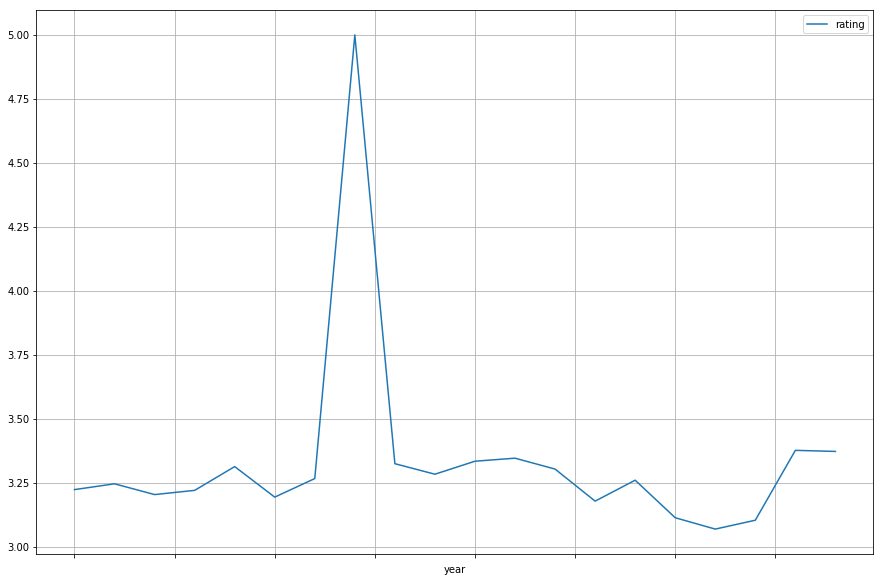

In [110]:
yearly_average[-20:].plot(x='year', y='rating', figsize=(15,10), grid=True)

<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold">

Do some years look better for the boxoffice movies than others? <br><br>

Does any data point seem like an outlier in some sense?

</p>